루키즈 개발 5기 박미정

## 4-1. 인구현황 데이터 분석 (필수)

In [23]:
import pandas as pd

df = pd.read_csv('../data/인구현황.csv', encoding='utf-8')
df_except_all = df[df['행정기관'] != '전국']
df_sorted = df_except_all.sort_values(by='총인구수', ascending=False)

### 1. 지역별 총인구수 Top5

In [51]:
# '총인구수' 기준 내림차순 정렬 후 상위 5개 추출
top5_population = df_sorted.head(5)
top5_population_result = top5_population[['행정기관', '총인구수']]
display(top5_population_result)

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [ ]:
### 1-1. 지역별 총인구수 plot

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [15]:
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_name)

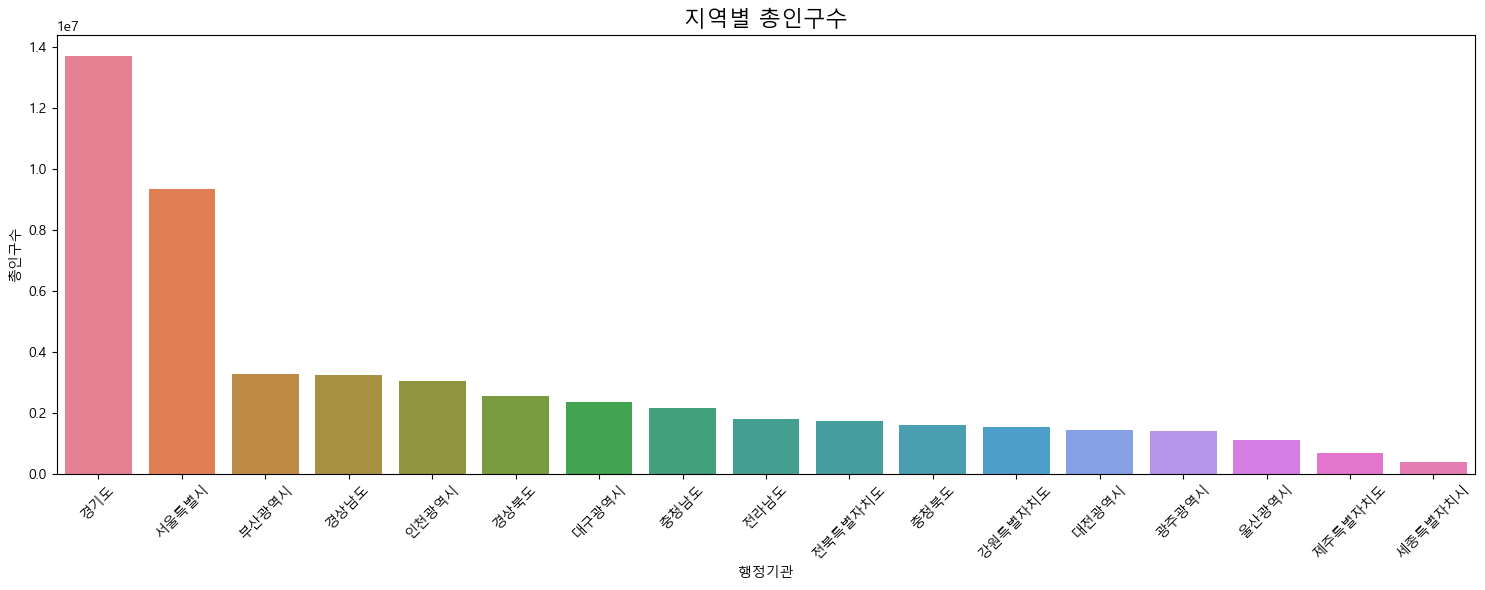

In [ ]:
plt.figure(figsize=(15, 6)) 

# sns.barplot을 사용해야 막대별로 다른 색상이 자동 할당
ax = sns.barplot(data=df_sorted, x='행정기관', y='총인구수', hue='행정기관', palette='husl', legend=False)

plt.title('지역별 총인구수', fontsize=16)
plt.xticks(rotation=45) # 지역명이 대각선으로 겹치지 않게 회전
plt.xlabel('행정기관')
plt.ylabel('총인구수')

plt.tight_layout()
plt.show()

### 2. 세대당 인구수 높은 지역 Top5

In [33]:
# 1. 데이터 복사본 생성 (경고 방지 및 기존 컬럼 활용)
df_household = df_except_all.copy()

# 2. '세대당 인구' 기준 내림차순 정렬 후 상위 5개 추출
top5_per_household = df_household.sort_values(by='세대당 인구', ascending=False).head(5)

# 3. 값 반올림 (이미지 예시와 동일하게 소수점 2자리)
top5_per_household['세대당 인구'] = top5_per_household['세대당 인구'].round(2)

# 4. 필요한 컬럼만 선택 및 인덱스 재설정
top5_per_household_result = top5_per_household[['행정기관', '세대당 인구']].reset_index(drop=True)

# 결과 출력
display(top5_per_household_result)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


In [34]:
display(top5_per_household_result)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


### 2-1. 지역별 세대당 인구 Plot

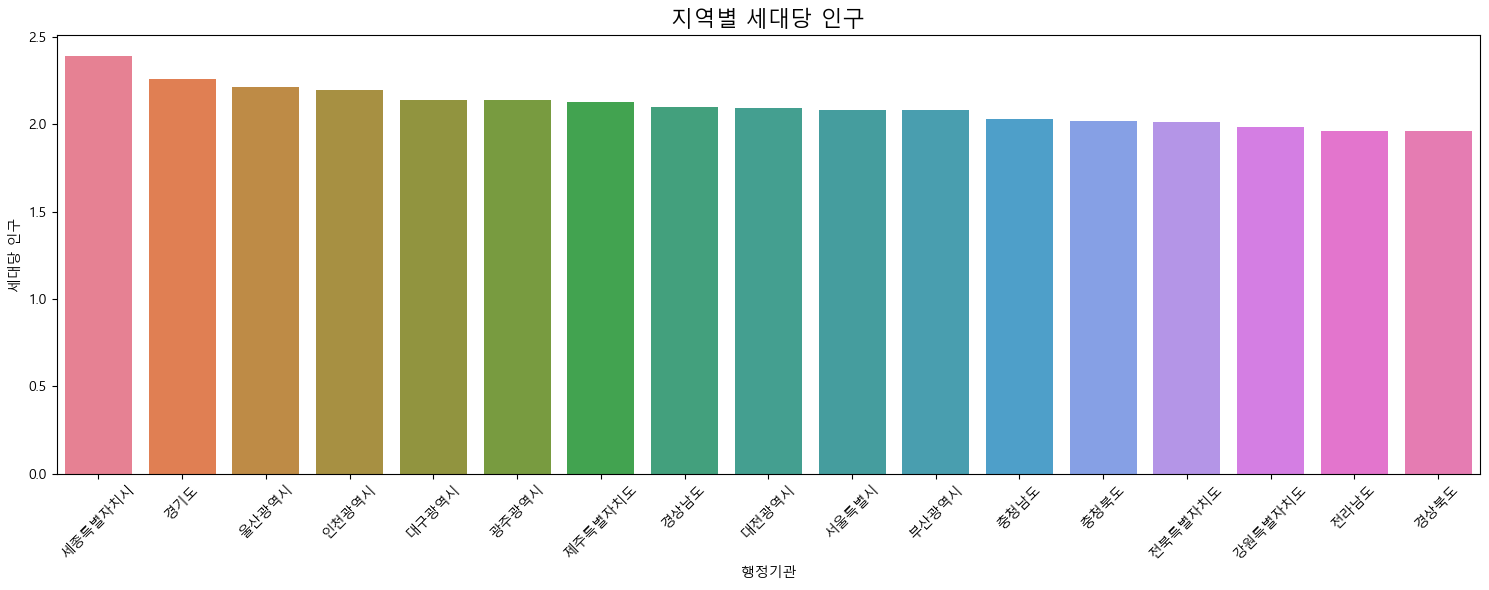

In [35]:
# '세대당 인구'를 기준으로 전체 데이터를 내림차순 정렬
df_sorted_household = df_except_all.sort_values(by='세대당 인구', ascending=False)

# 시각화 설정
plt.figure(figsize=(15, 6))

# 막대 그래프 생성 (palette='husl'을 사용하여 이미지와 유사한 다채로운 색상 적용)
ax = sns.barplot(data=df_sorted_household, x='행정기관', y='세대당 인구', hue='행정기관', palette='husl', legend=False)

# 그래프 제목 및 라벨 설정
plt.title('지역별 세대당 인구', fontsize=16)
plt.xticks(rotation=45)  # x축 지역명을 45도 회전하여 겹침 방지
plt.xlabel('행정기관')
plt.ylabel('세대당 인구')

# 레이아웃 최적화 및 출력
plt.tight_layout()
plt.show()

### 3. 남녀 비율 분석

In [50]:
# 1. '남여 비율' 기준 내림차순 정렬
# sort_values: 복사본으로 작업
df_gender_ratio = df_except_all.sort_values(by='남여 비율', ascending=False)

# 2. 소수점 둘째 자리까지 반올림 (이미지 예시와 동일하게 설정)
df_gender_ratio['남여 비율'] = df_gender_ratio['남여 비율'].round(2)

# 3. 필요한 컬럼('행정기관', '남여 비율')만 선택하여 출력
gender_ratio_result = df_gender_ratio[['행정기관', '남여 비율']].reset_index(drop=True)
display(gender_ratio_result)

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


### 3-1. 남녀 비율 분석 Plot

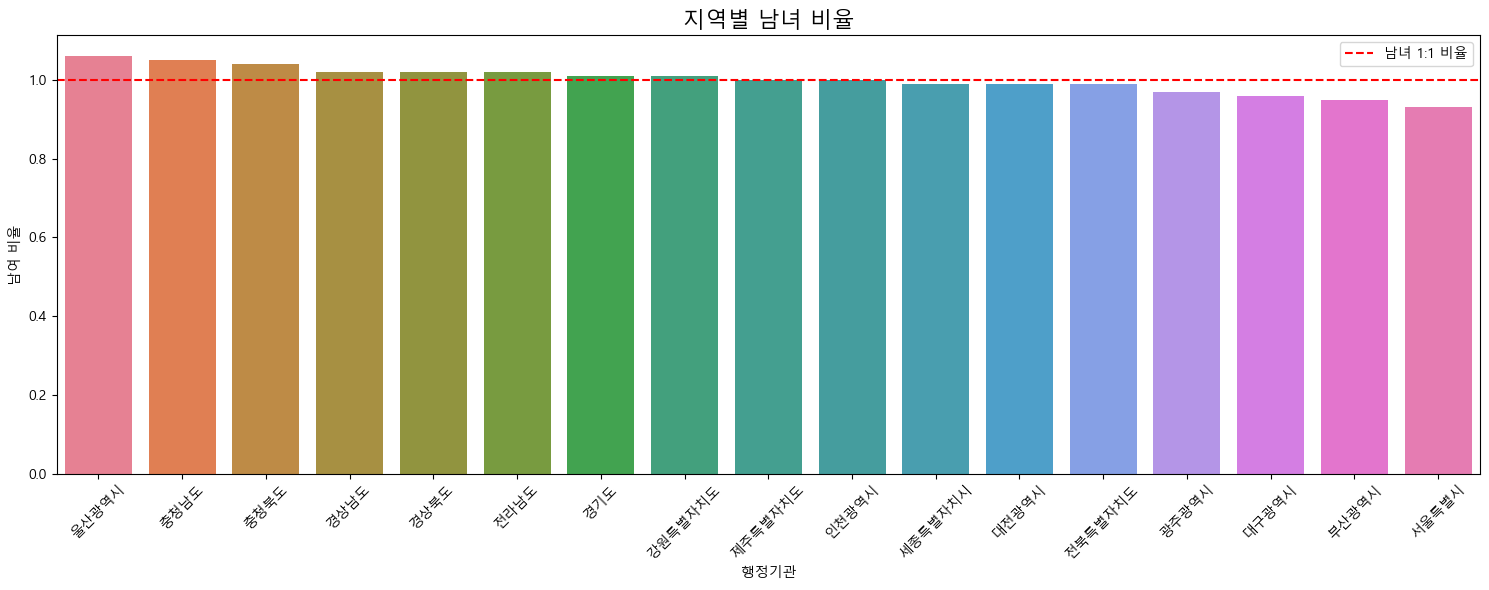

In [37]:
# 시각화 설정
plt.figure(figsize=(15, 6))

# 남여 비율 시각화 (기존 정렬된 데이터 사용)
ax = sns.barplot(data=df_gender_ratio, x='행정기관', y='남여 비율', hue='행정기관', palette='husl', legend=False)

# 기준선 추가: label 파라미터를 사용하여 범례 이름 지정
plt.axhline(1, color='red', linestyle='--', linewidth=1.5, label='남녀 1:1 비율')

# 범례 표시 호출
plt.legend()

plt.title('지역별 남녀 비율', fontsize=16)
plt.xticks(rotation=45) # 지역명 겹침 방지
plt.xlabel('행정기관')
plt.ylabel('남여 비율')

plt.tight_layout()
plt.show()

### 4. 남자초과 / 여자초과 분석

In [38]:
# 1. 상태 판별 함수 정의
def get_gender_status(ratio):
    if ratio > 1.0:
        return '남초'
    elif ratio < 1.0:
        return '여초'
    else:
        return '동일'

In [49]:
# 2. 데이터 복사 및 함수 적용
df_gender_status = df_except_all.copy()
df_gender_status['남초여초'] = df_gender_status['남여 비율'].apply(get_gender_status)

# 3. 필요한 컬럼만 선택하여 확인
gender_status_result = df_gender_status[['행정기관', '남여 비율', '남초여초']].reset_index(drop=True)
display(gender_status_result)

,행정기관,남여 비율,남초여초
0,서울특별시,0.93,여초
1,부산광역시,0.95,여초
2,대구광역시,0.96,여초
3,인천광역시,1.00,동일
4,광주광역시,0.97,여초
5,대전광역시,0.99,여초
6,울산광역시,1.06,남초
7,세종특별자치시,0.99,여초
8,경기도,1.01,남초
9,강원특별자치도,1.01,남초


### 5. 세대당 인구 평균보다 높은 지역

In [42]:
# 1. 전체 지역의 세대당 인구 평균 계산
avg_household = df_except_all['세대당 인구'].mean()

# 2. 이미지와 동일한 텍스트 형식 출력
print(f"5. 세대당 인구 평균보다 높은 지역")
print(f"전국 평균 세대당 인구수: {avg_household:.2f}") # 소수점 2자리까지 출력

# 3. 평균보다 높은 지역만 필터링하여 내림차순 정렬
df_above_avg = df_except_all[df_except_all['세대당 인구'] > avg_household].copy()
df_above_avg = df_above_avg.sort_values(by='세대당 인구', ascending=False)

# 4. 소수점 2자리 반올림 및 인덱스 재설정
df_above_avg['세대당 인구'] = df_above_avg['세대당 인구'].round(2)
result_5 = df_above_avg[['행정기관', '세대당 인구']].reset_index(drop=True)

# 5. 최종 표(DataFrame) 출력
display(result_5)

5. 세대당 인구 평균보다 높은 지역
전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


### 5-1. 남초 vs 여초 개수 Plot  ( seaborn의 countplot )

C:\Users\user\AppData\Local\Temp\ipykernel_33320\1141477116.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


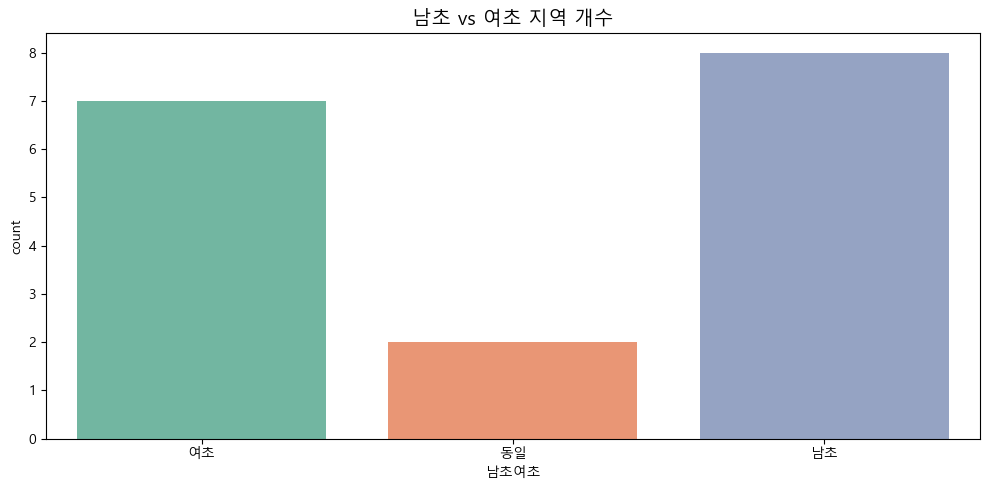

In [56]:
# 1. 시각화 설정
plt.figure(figsize=(10, 5))

# 2. 색상 딕셔너리 설정 (여초: 파랑, 동일: 주홍, 남초: 초록)
# 'orange'는 주홍색 계열이며, 더 진한 색을 원하시면 'orangered' 등을 사용할 수 있습니다.
custom_palette = {'여초': 'blue', '동일': 'orange', '남초': 'green'}

# 3. countplot 생성
# x축을 '남초여초'로 지정하고, palette에 위에서 만든 딕셔너리를 전달합니다.

sns.countplot(
    data=df_gender_status,
    x='남초여초',
    order=['여초', '동일', '남초'],
    palette='Set2'   # 자동 색상 팔레트
)

# 4. 제목 및 레이블 설정
plt.title('남초 vs 여초 지역 개수', fontsize=14)
plt.xlabel('남초여초')
plt.ylabel('count')

# 5. 출력
plt.tight_layout()
plt.show()

### 5.1 지역별 세대수 Plot ( seaborn의 barplot )

C:\Users\user\AppData\Local\Temp\ipykernel_33320\3096575770.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_household_sorted, x='행정기관', y='세대수', palette='husl')


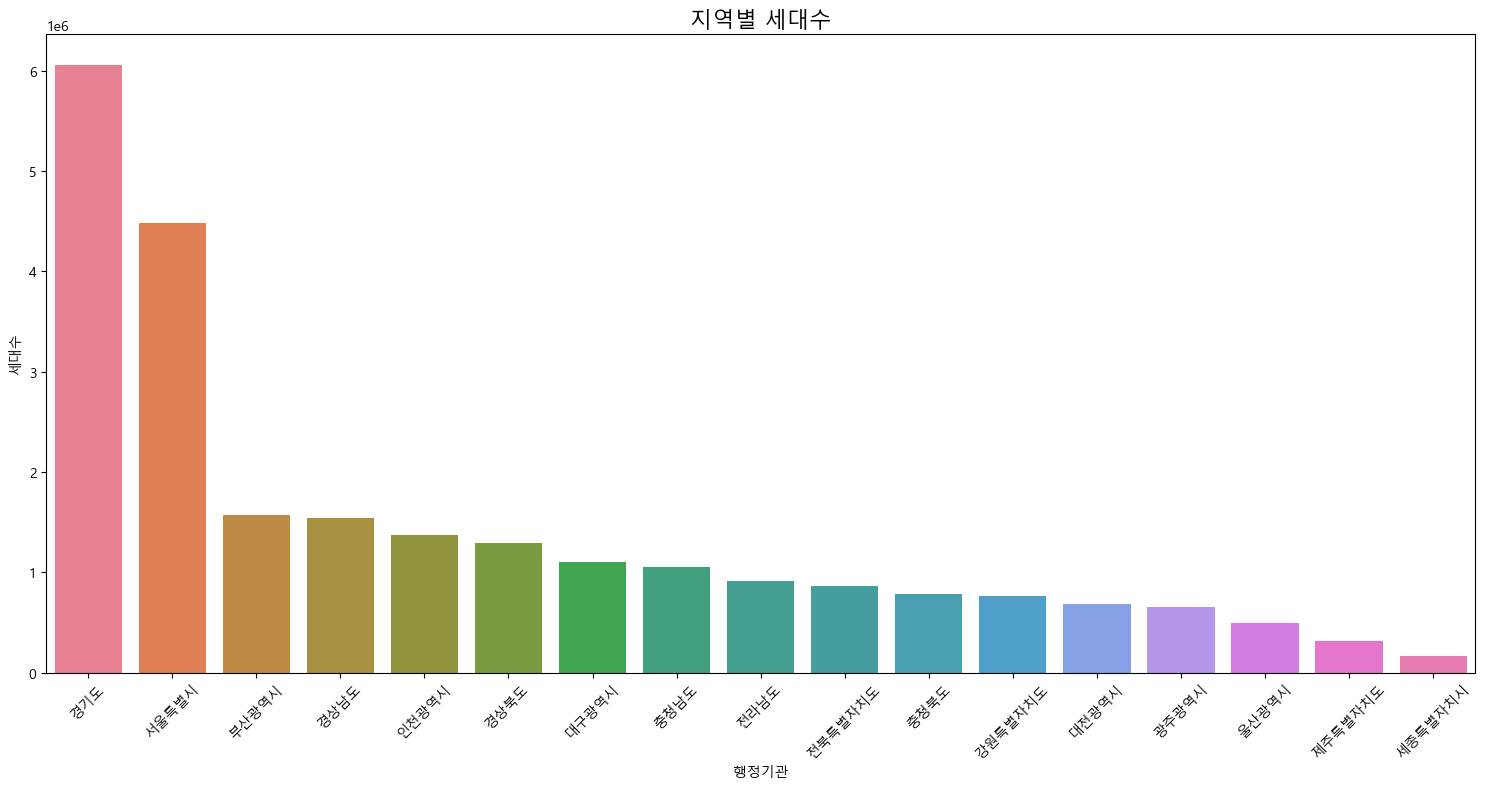

In [57]:
# 1. 시각화 설정 (도표 크기)
plt.figure(figsize=(15, 8))

# 2. 데이터를 '세대수' 기준으로 내림차순 정렬
# df_except_all 데이터프레임을 사용한다고 가정합니다.
df_household_sorted = df_except_all.sort_values(by='세대수', ascending=False)

# 3. seaborn의 barplot 생성
# x축은 행정기관, y축은 세대수로 설정합니다.
sns.barplot(data=df_household_sorted, x='행정기관', y='세대수', palette='husl')

# 4. 그래프 제목 및 축 레이블 설정
plt.title('지역별 세대수', fontsize=16)
plt.xticks(rotation=45) # x축 지역명이 겹치지 않도록 회전
plt.xlabel('행정기관')
plt.ylabel('세대수')

# 5. 레이아웃 최적화 및 출력
plt.tight_layout()
plt.show()

### 6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )

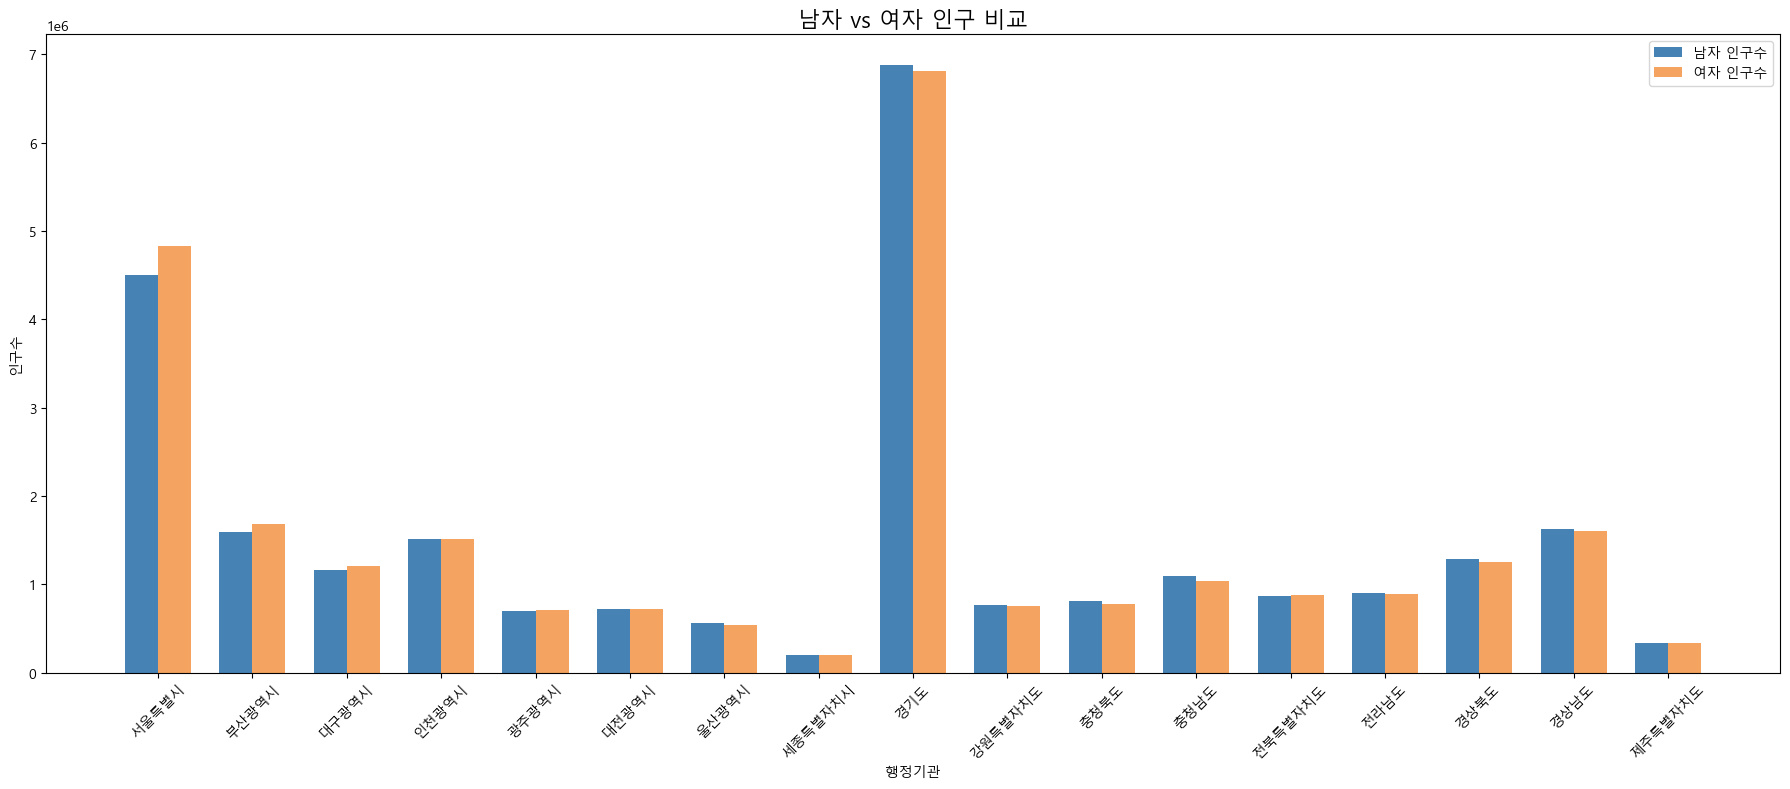

In [58]:
# 1. 시각화 데이터 준비 (행정기관별 남자/여자 인구수)
# x축에 표시할 지역 이름 리스트
regions = df_except_all['행정기관']
male_pop = df_except_all['남자 인구수']
female_pop = df_except_all['여자 인구수']

# 2. 그래프 설정
x = range(len(regions)) # x축 위치 값
width = 0.35           # 막대 너비 설정

plt.figure(figsize=(18, 8))

# 남자 인구수 막대
plt.bar([i - width/2 for i in x], male_pop, width, label='남자 인구수', color='steelblue')
# 여자 인구수 막대
plt.bar([i + width/2 for i in x], female_pop, width, label='여자 인구수', color='sandybrown')

# 3. 레이블 및 서식 설정
plt.title('남자 vs 여자 인구 비교', fontsize=16)
plt.xticks(x, regions, rotation=45) # x축 눈금을 행정기관명으로 교체 및 회전
plt.xlabel('행정기관')
plt.ylabel('인구수')
plt.legend() # 우측 상단 범례 표시

# 4. 출력
plt.tight_layout()
plt.show()